In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("titanic.csv")

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Univariate Analysis

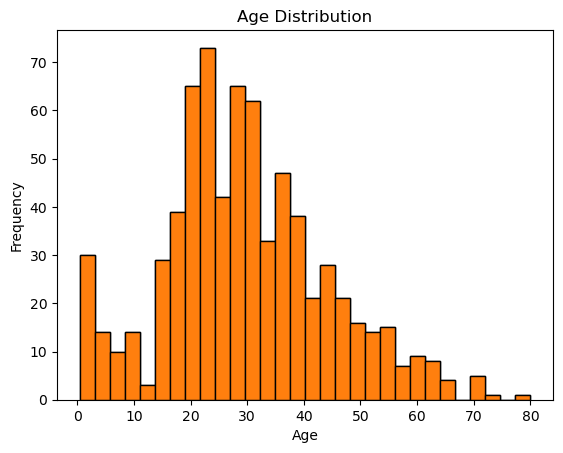

In [4]:
plt.hist(data['age'].dropna(), bins=30, edgecolor='black')
plt.hist(data['age'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

## Bi - Variate Analysis

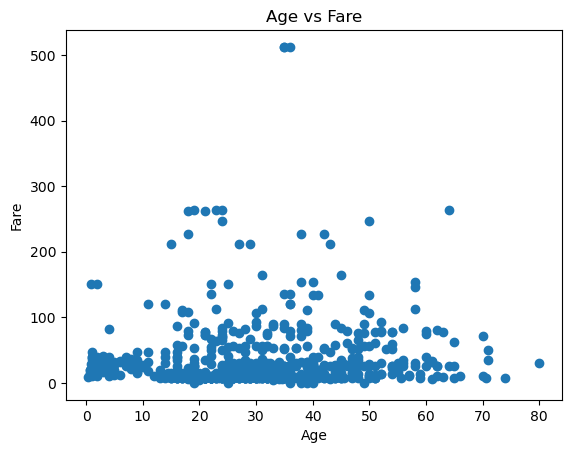

In [5]:
plt.scatter(data['age'], data['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()

## Multi - Variate Analysis

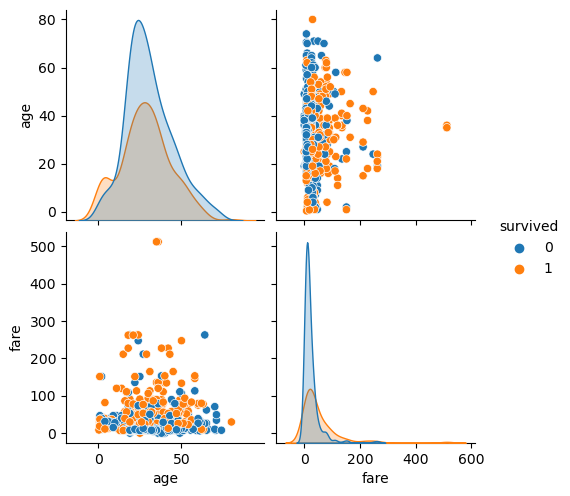

In [6]:
variables = ['age', 'fare', 'survived']
sns.pairplot(data[variables].dropna(), hue='survived')

plt.show()

## Descriptive Statistics

In [7]:
numeric_stats = data.describe()
print("Numeric Descriptive Statistics:")
print(numeric_stats)

categorical_stats = data.describe(include='object')
print("\nCategorical Descriptive Statistics:")
print(categorical_stats)

Numeric Descriptive Statistics:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Categorical Descriptive Statistics:
         sex embarked  class  who deck  embark_town alive
count    891      889    891  891  203          889   891
unique     2        3      3    3    7            3     2
top     male        S  Third  man    C  Southampton    

## Missing Values

In [8]:
data.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
missing_values=data.isnull().sum()

In [10]:
missing_values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
data['age'].fillna(data['age'].mean(), inplace=True)
data.dropna(subset=['embarked'], inplace=True)
missing_values_after = data.isnull().sum()
print("\nMissing Values After Handling:")
print(missing_values_after)


Missing Values After Handling:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


## Outliers and Replace the Outliers

In [12]:
data['Fare_zscore'] = (data['fare'] - data['fare'].mean()) / data['fare'].std()
zscore_threshold = 3

outliers = data.loc[np.abs(data['Fare_zscore']) > zscore_threshold]

print("Outliers:")
print(outliers)

median_fare = data['fare'].median()
data.loc[np.abs(data['Fare_zscore']) > zscore_threshold, 'Fare'] = median_fare

data.drop('Fare_zscore', axis=1, inplace=True)

outliers_after = data.loc[np.abs((data['fare'] - data['fare'].mean()) / data['fare'].std()) > zscore_threshold]
print("\nOutliers After Replacement:")
print(outliers_after)

Outliers:
     survived  pclass     sex        age  sibsp  parch      fare embarked  \
27          0       1    male  19.000000      3      2  263.0000        S   
88          1       1  female  23.000000      3      2  263.0000        S   
118         0       1    male  24.000000      0      1  247.5208        C   
258         1       1  female  35.000000      0      0  512.3292        C   
299         1       1  female  50.000000      0      1  247.5208        C   
311         1       1  female  18.000000      2      2  262.3750        C   
341         1       1  female  24.000000      3      2  263.0000        S   
377         0       1    male  27.000000      0      2  211.5000        C   
380         1       1  female  42.000000      0      0  227.5250        C   
438         0       1    male  64.000000      1      4  263.0000        S   
527         0       1    male  29.699118      0      0  221.7792        S   
557         0       1    male  29.699118      0      0  227.5250  

## Categorical Columns and Encoding

In [13]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:")
print(categorical_columns)
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(data[categorical_columns])
encoded_column_names = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_column_names)
data_encoded = pd.concat([data, encoded_df], axis=1)
data_encoded.drop(categorical_columns, axis=1, inplace=True)
print("\nEncoded Dataset:")
print(data_encoded.head())

Categorical Columns:
Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')

Encoded Dataset:
   survived  pclass   age  sibsp  parch     fare adult_male  alone  Fare  \
0       0.0     3.0  22.0    1.0    0.0   7.2500       True  False   NaN   
1       1.0     1.0  38.0    1.0    0.0  71.2833      False  False   NaN   
2       1.0     3.0  26.0    0.0    0.0   7.9250      False   True   NaN   
3       1.0     1.0  35.0    1.0    0.0  53.1000      False  False   NaN   
4       0.0     3.0  35.0    0.0    0.0   8.0500       True   True   NaN   

   sex_male  ...  deck_B  deck_C  deck_D  deck_E  deck_F  deck_G  deck_nan  \
0       1.0  ...     0.0     0.0     0.0     0.0     0.0     0.0       1.0   
1       0.0  ...     0.0     1.0     0.0     0.0     0.0     0.0       0.0   
2       0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0       1.0   
3       0.0  ...     0.0     1.0     0.0     0.0     0.0     0.0       0.0   
4       1.0  ...     0.

/home/raghu/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Split - Dependent amd Independent

In [14]:
y = data['survived']
X = data.drop('survived', axis=1)
print("Shape of y (dependent variable):", y.shape)
print("Shape of X (independent variables):", X.shape)

Shape of y (dependent variable): (889,)
Shape of X (independent variables): (889, 15)


## Scale the Independent Variables

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

X_scaled = preprocessor.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
print("Scaled Features:")
print(X_scaled.head())

Scaled Features:
    0    1    2    3    4    5    6    7    8    9   ...   20   21   22   23  \
0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  1.0  1.0  0.0   
1  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
2  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0  1.0   
3  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  1.0   
4  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  1.0  1.0  0.0   

         24        25        26        27        28  29  
0  0.825209 -0.590495  0.431350 -0.474326 -0.500240 NaN  
1 -1.572211  0.643971  0.431350 -0.474326  0.788947 NaN  
2  0.825209 -0.281878 -0.475199 -0.474326 -0.486650 NaN  
3 -1.572211  0.412509  0.431350 -0.474326  0.422861 NaN  
4  0.825209  0.412509 -0.475199 -0.474326 -0.484133 NaN  

[5 rows x 30 columns]


## Training and Testing

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (711, 15)
Shape of X_test: (178, 15)
Shape of y_train: (711,)
Shape of y_test: (178,)
